买了vps, 启动的你的服务器, 现在是可以进入了, 接下来要做些什么呢? 比如买域名, 弄SSL证书, 然后呢怎么放到服务器上, ummmm, 这貌似还有很多东西需要做哎.

首先有一些概念需要了解, 

## 1. NameServers (DNS Server)
---

注意买的域名默认也有nameservers, 可以看下图, 但是为什么域名也有NameServer呢? 

不了解的话请回去看[005 DNS Root Server & Name Server](1)

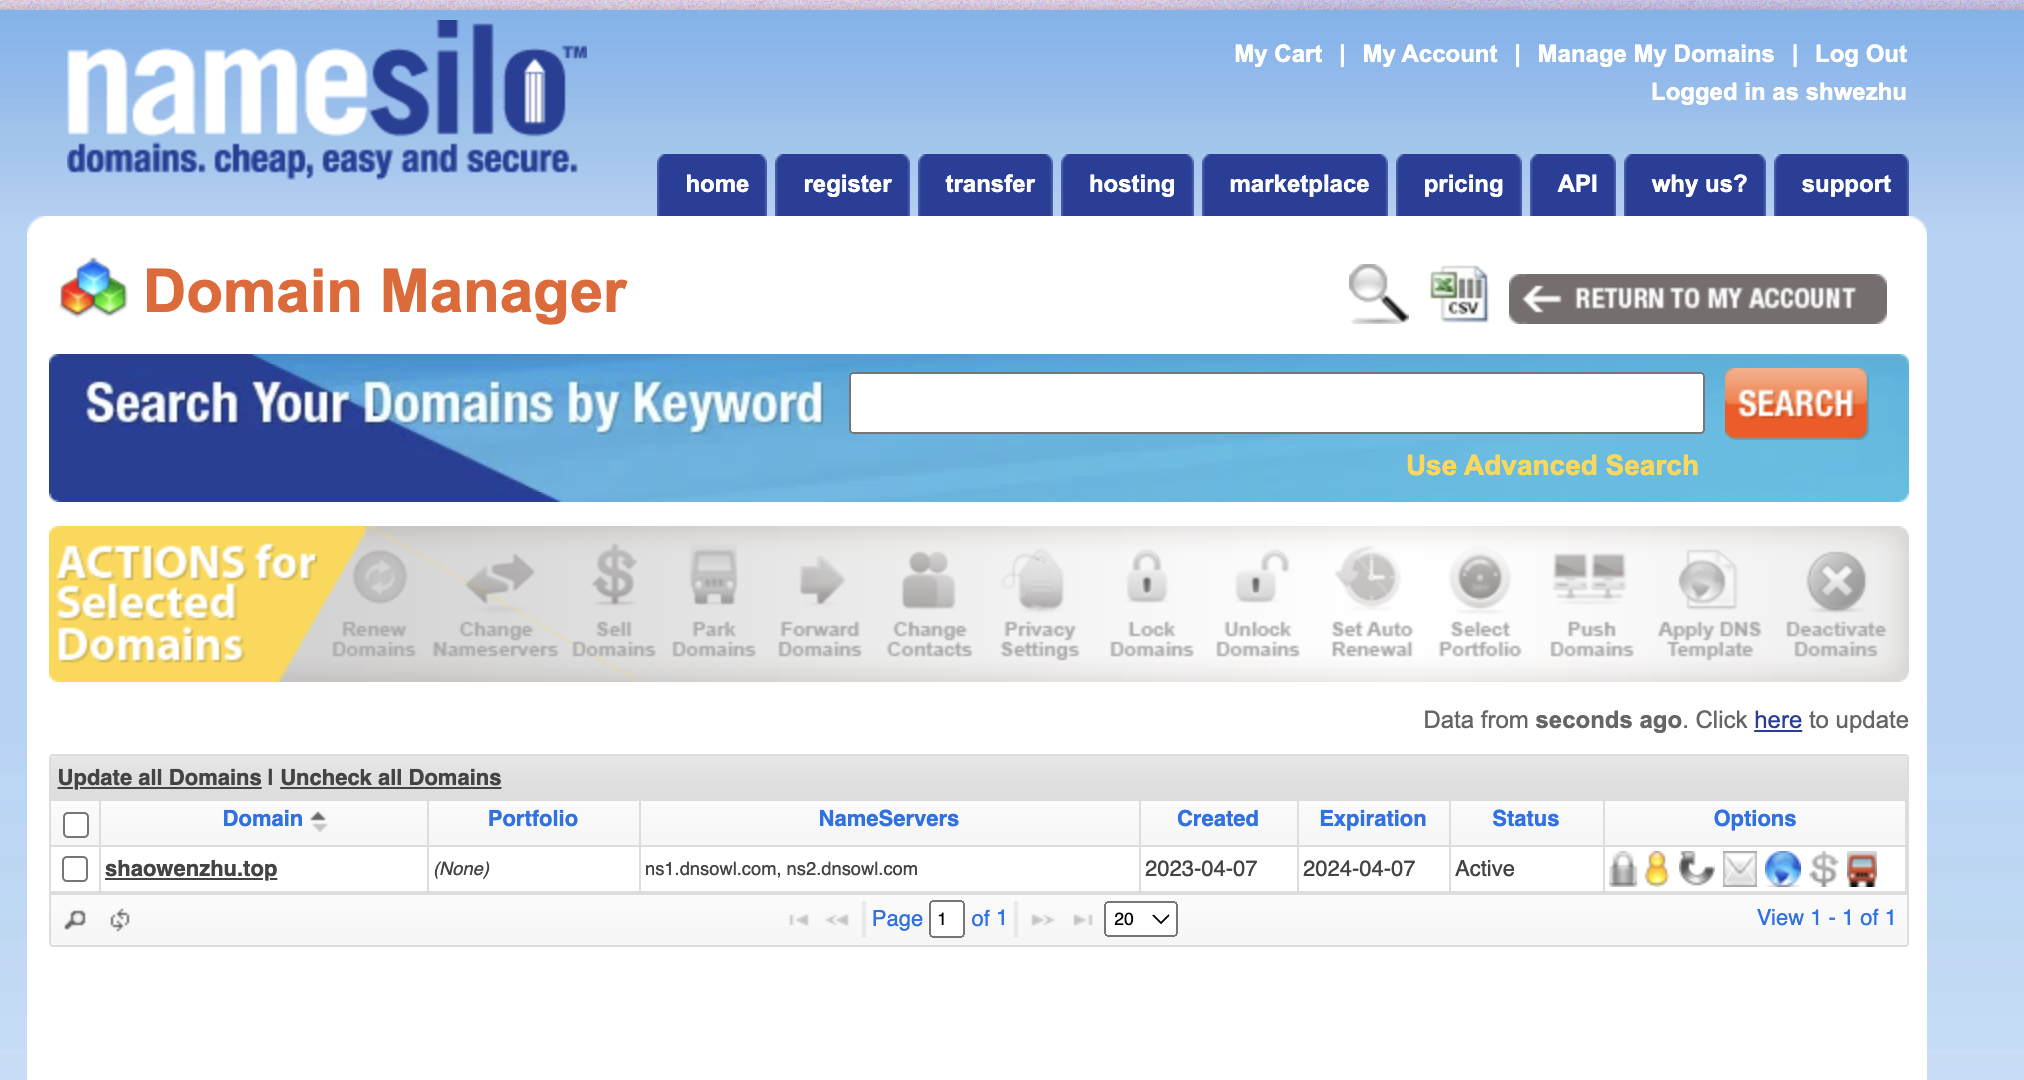

## 2. Domain Registrars 
-----

A domain registrar is a service that sells and manages domain names. Domain registrars are approved and overseen by the Internet Corporation for Assigned Names and Numbers (ICANN).

- Domain.com
- Namecheap
- NameSilo 我就是在这买的域名 第一年$2.99



## 3. WHOIS
---

Most domain names registered through **domain registrars** for that matter, require the collection of essential contact information, such as the registrant’s name, email address, mailing address, phone number, etc. This information is used in case a dispute arises about the domain name.

This information is often displayed in the global **Whois** system (also known as WHOIS). Information displayed in the global WHOIS is public and can be viewed by anyone.

If you would like to keep your contact information private for a domain then you may enable the WHOIS privacy service on your **domain registrar**.

This service will replace the public information that you provide with an anonymous proxy identity in the public WHOIS database. This includes replacing your email address with a proxy email address and replacing your address and contact information with the information from an entity called “Whois Privacy Protection Service, Inc.”.

买域名的时候会有更新profile基础信息的要求, 然后我在namesilo买的域名, 在域名管理页面确实可以修改WHOIS服务以及可以修改NameServer, 如下图:

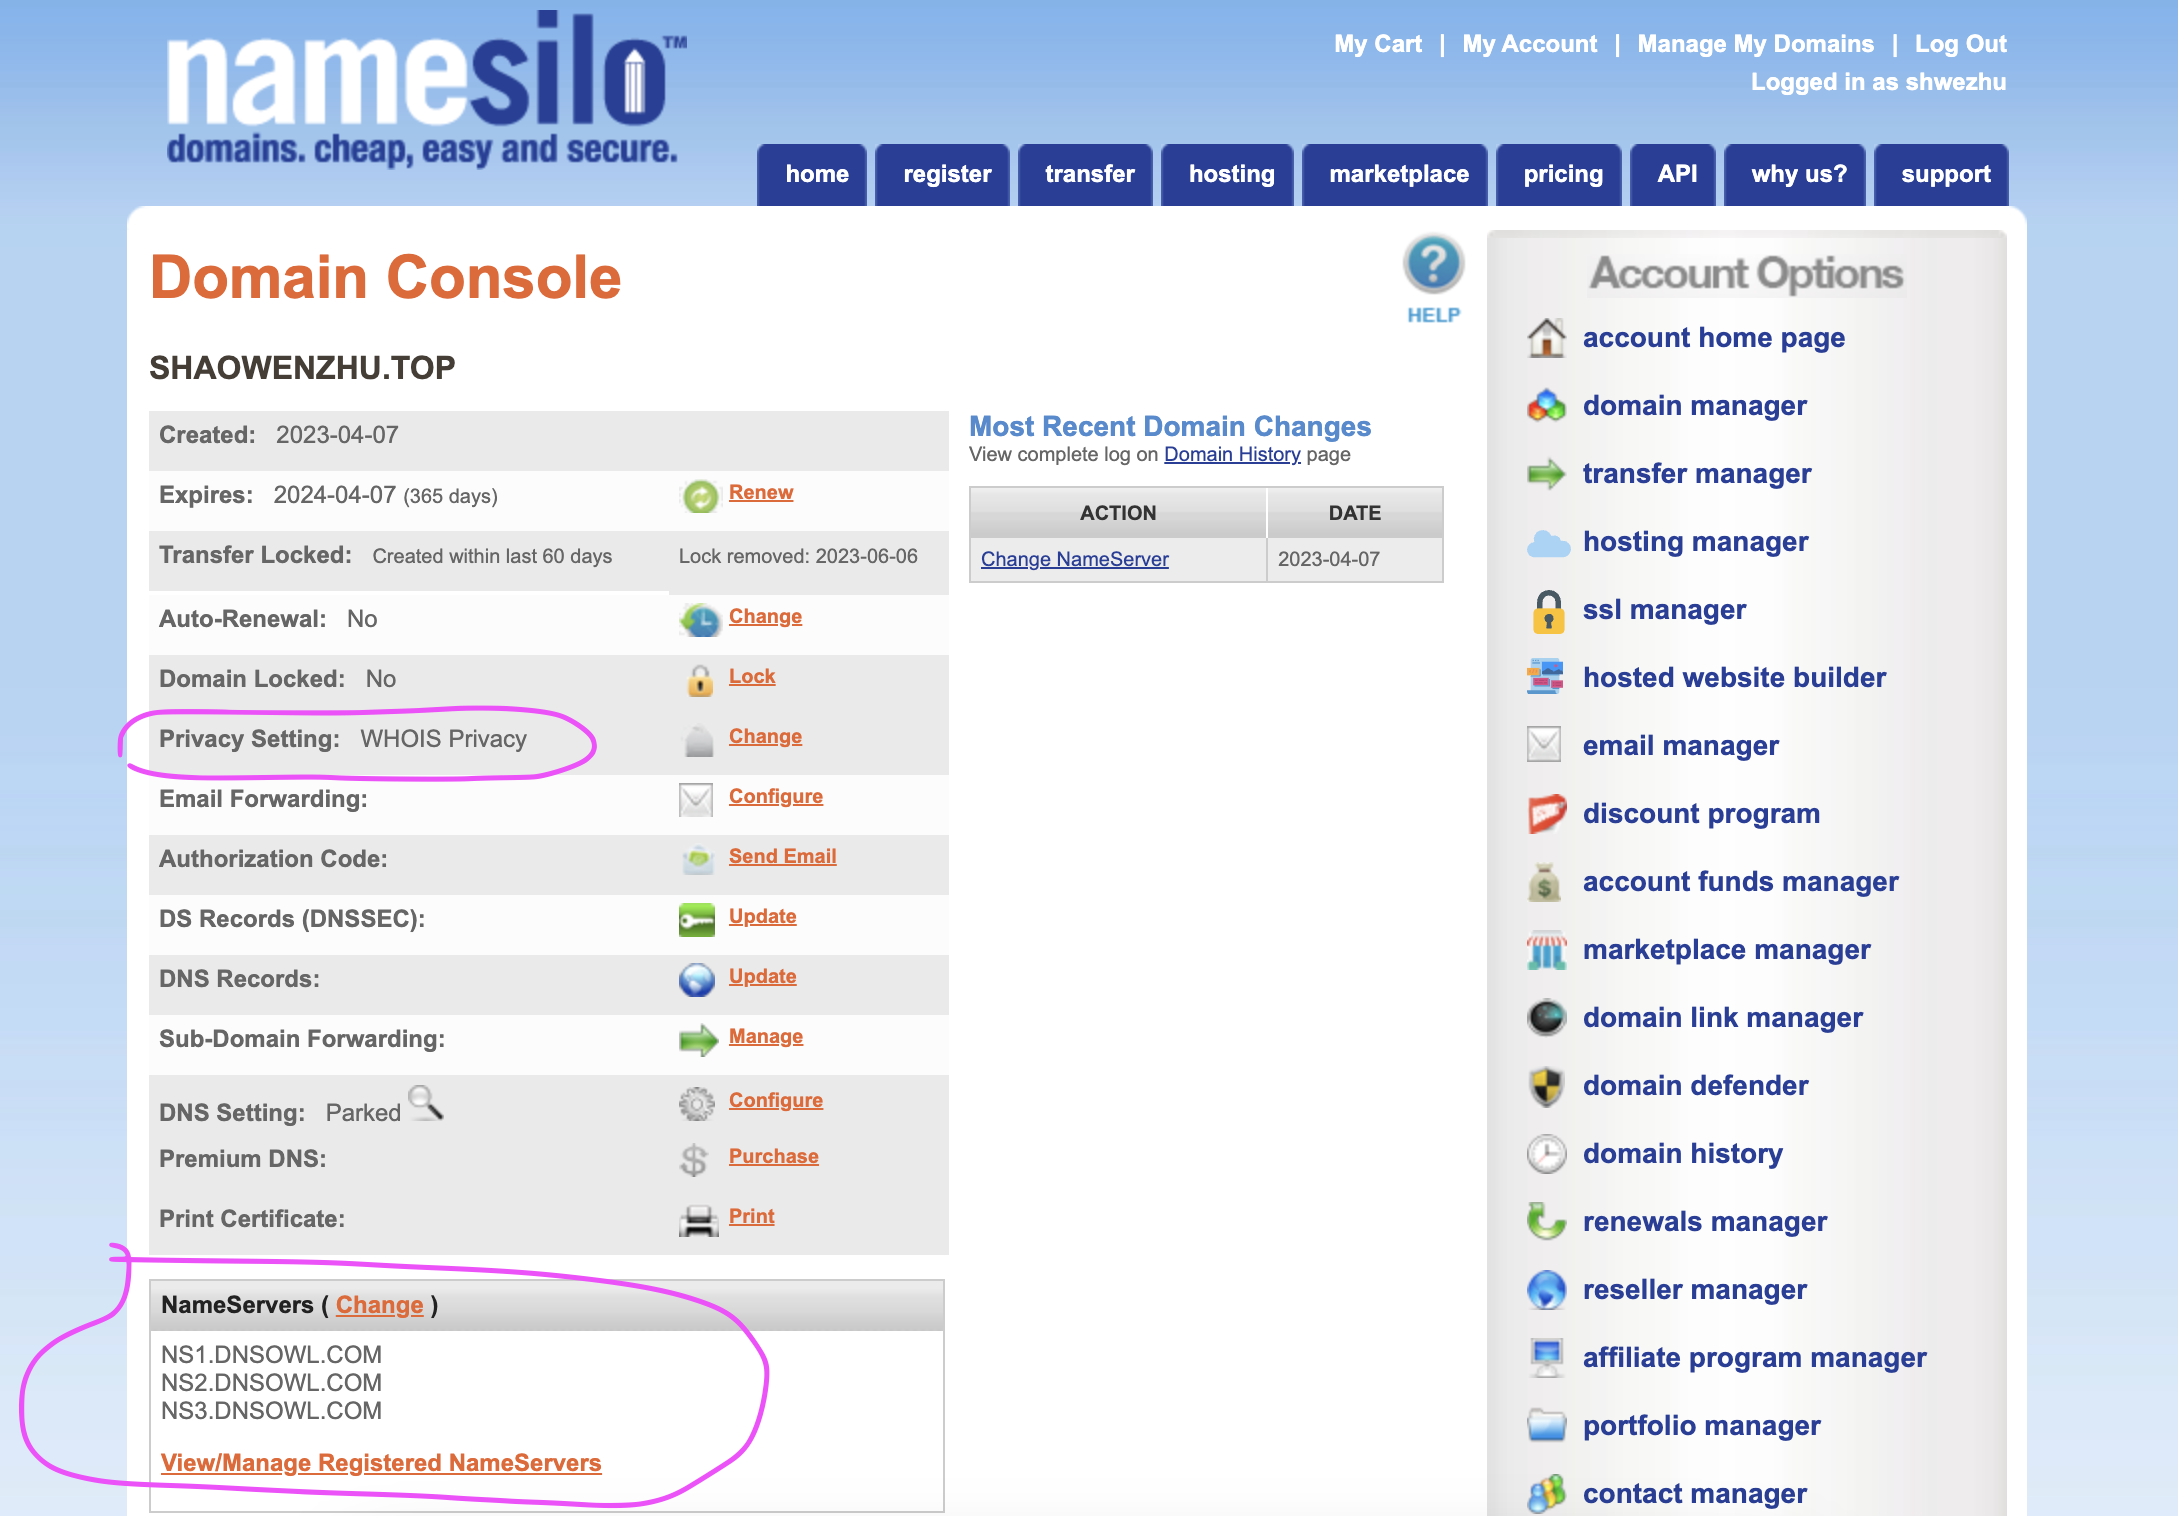

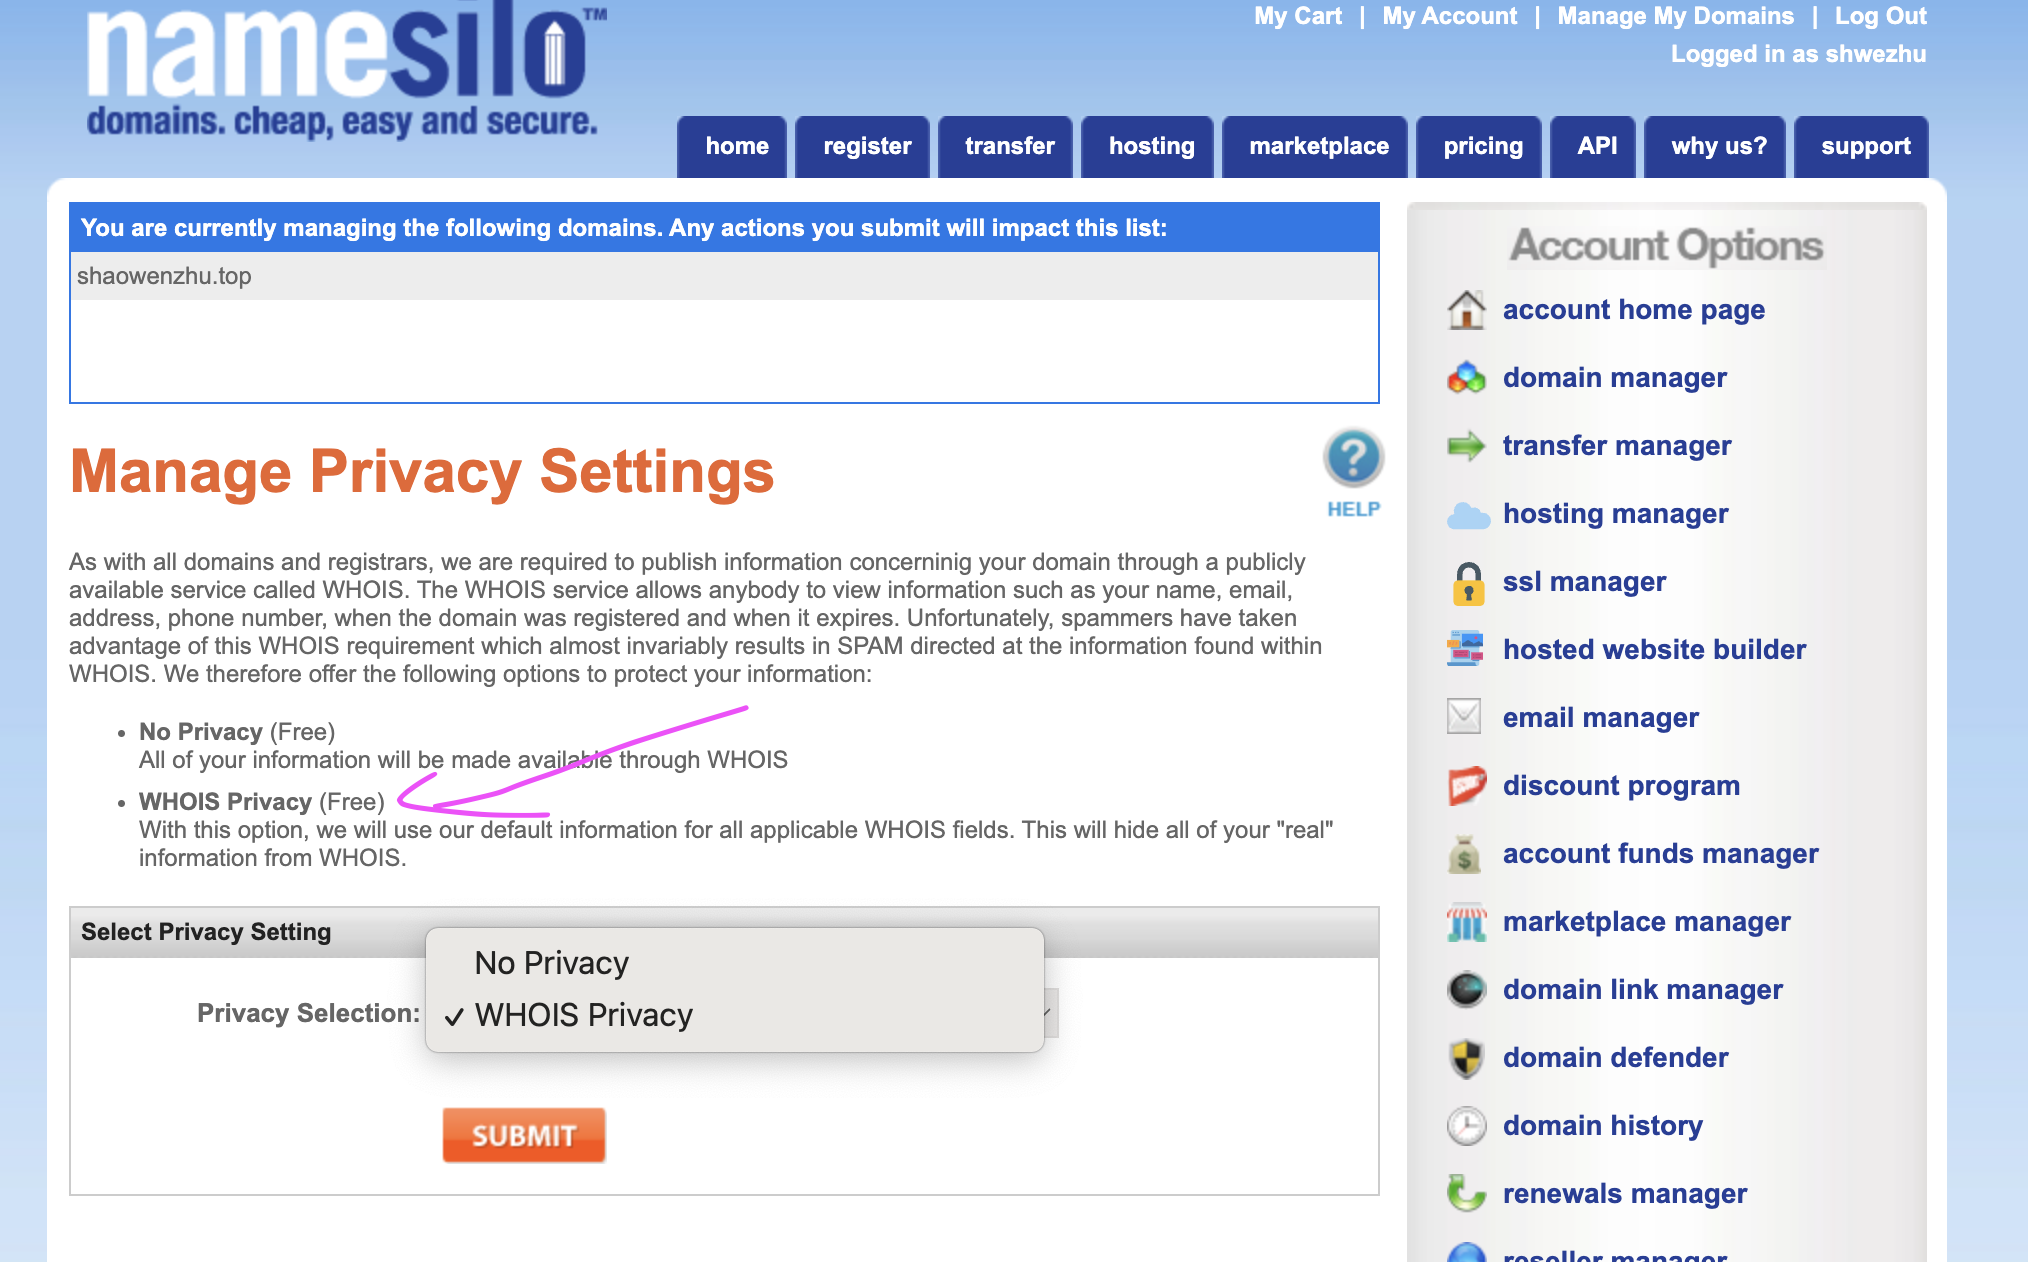

## 4. 绑定域名到远程主机
----

把域名的自带DNS Records全删了, 然后增加一个A类型的DNS Record即可(增加DNS Record的时候主机名空着或者填`@`), 不用修改域名的NameServers如下图:

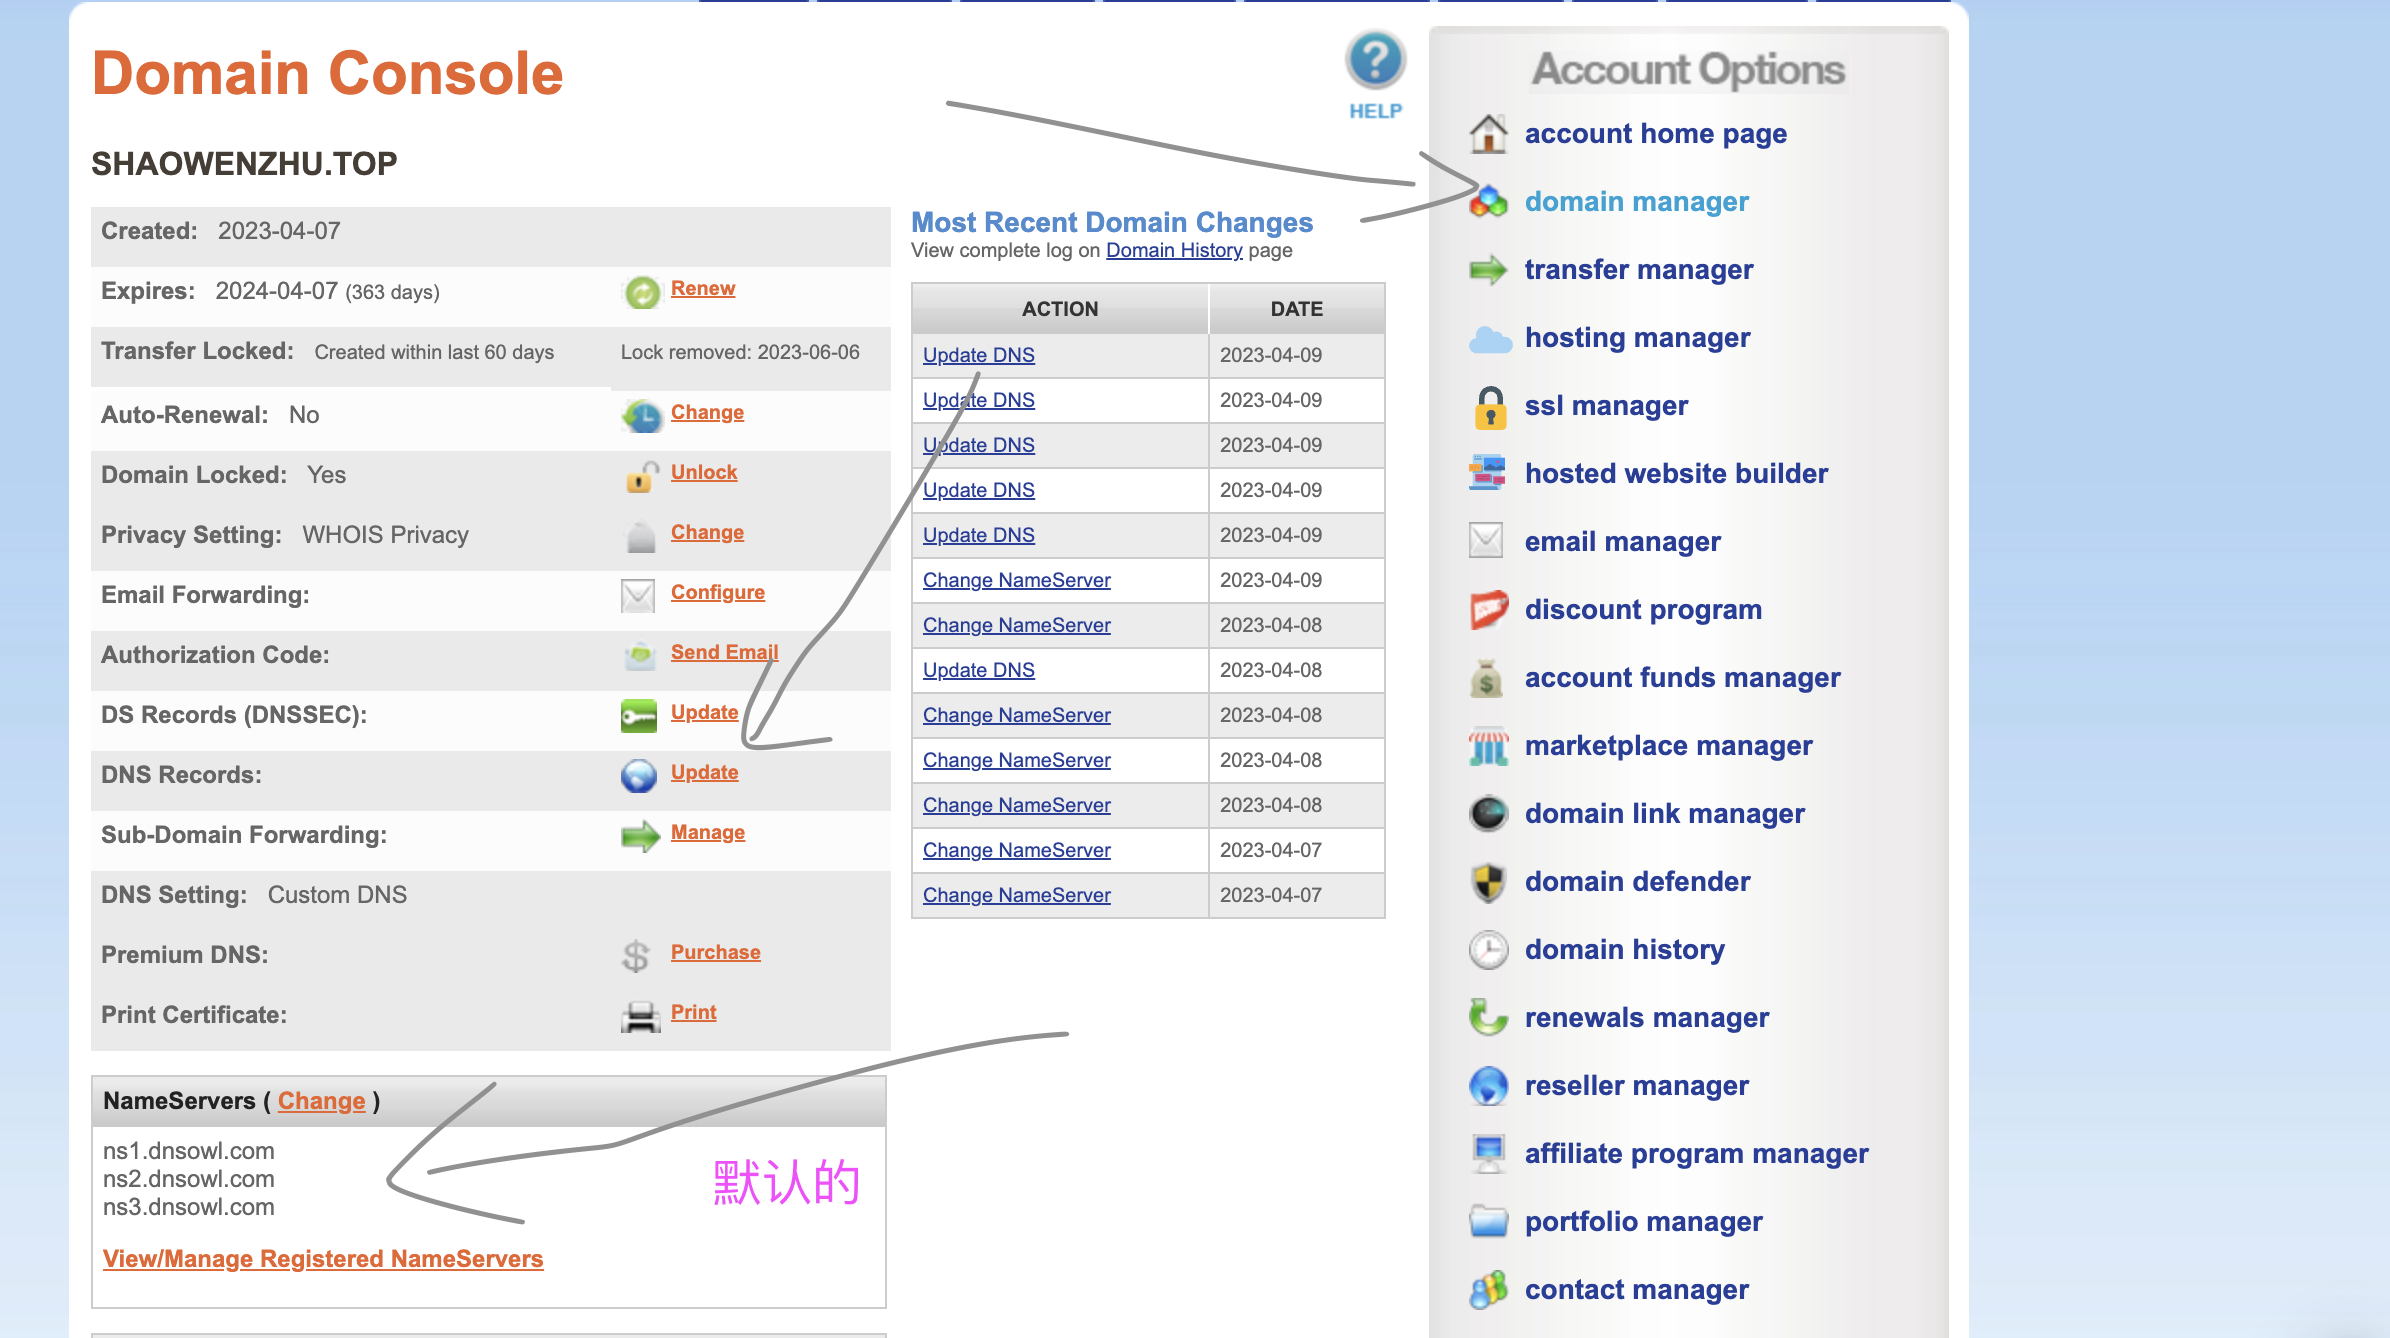

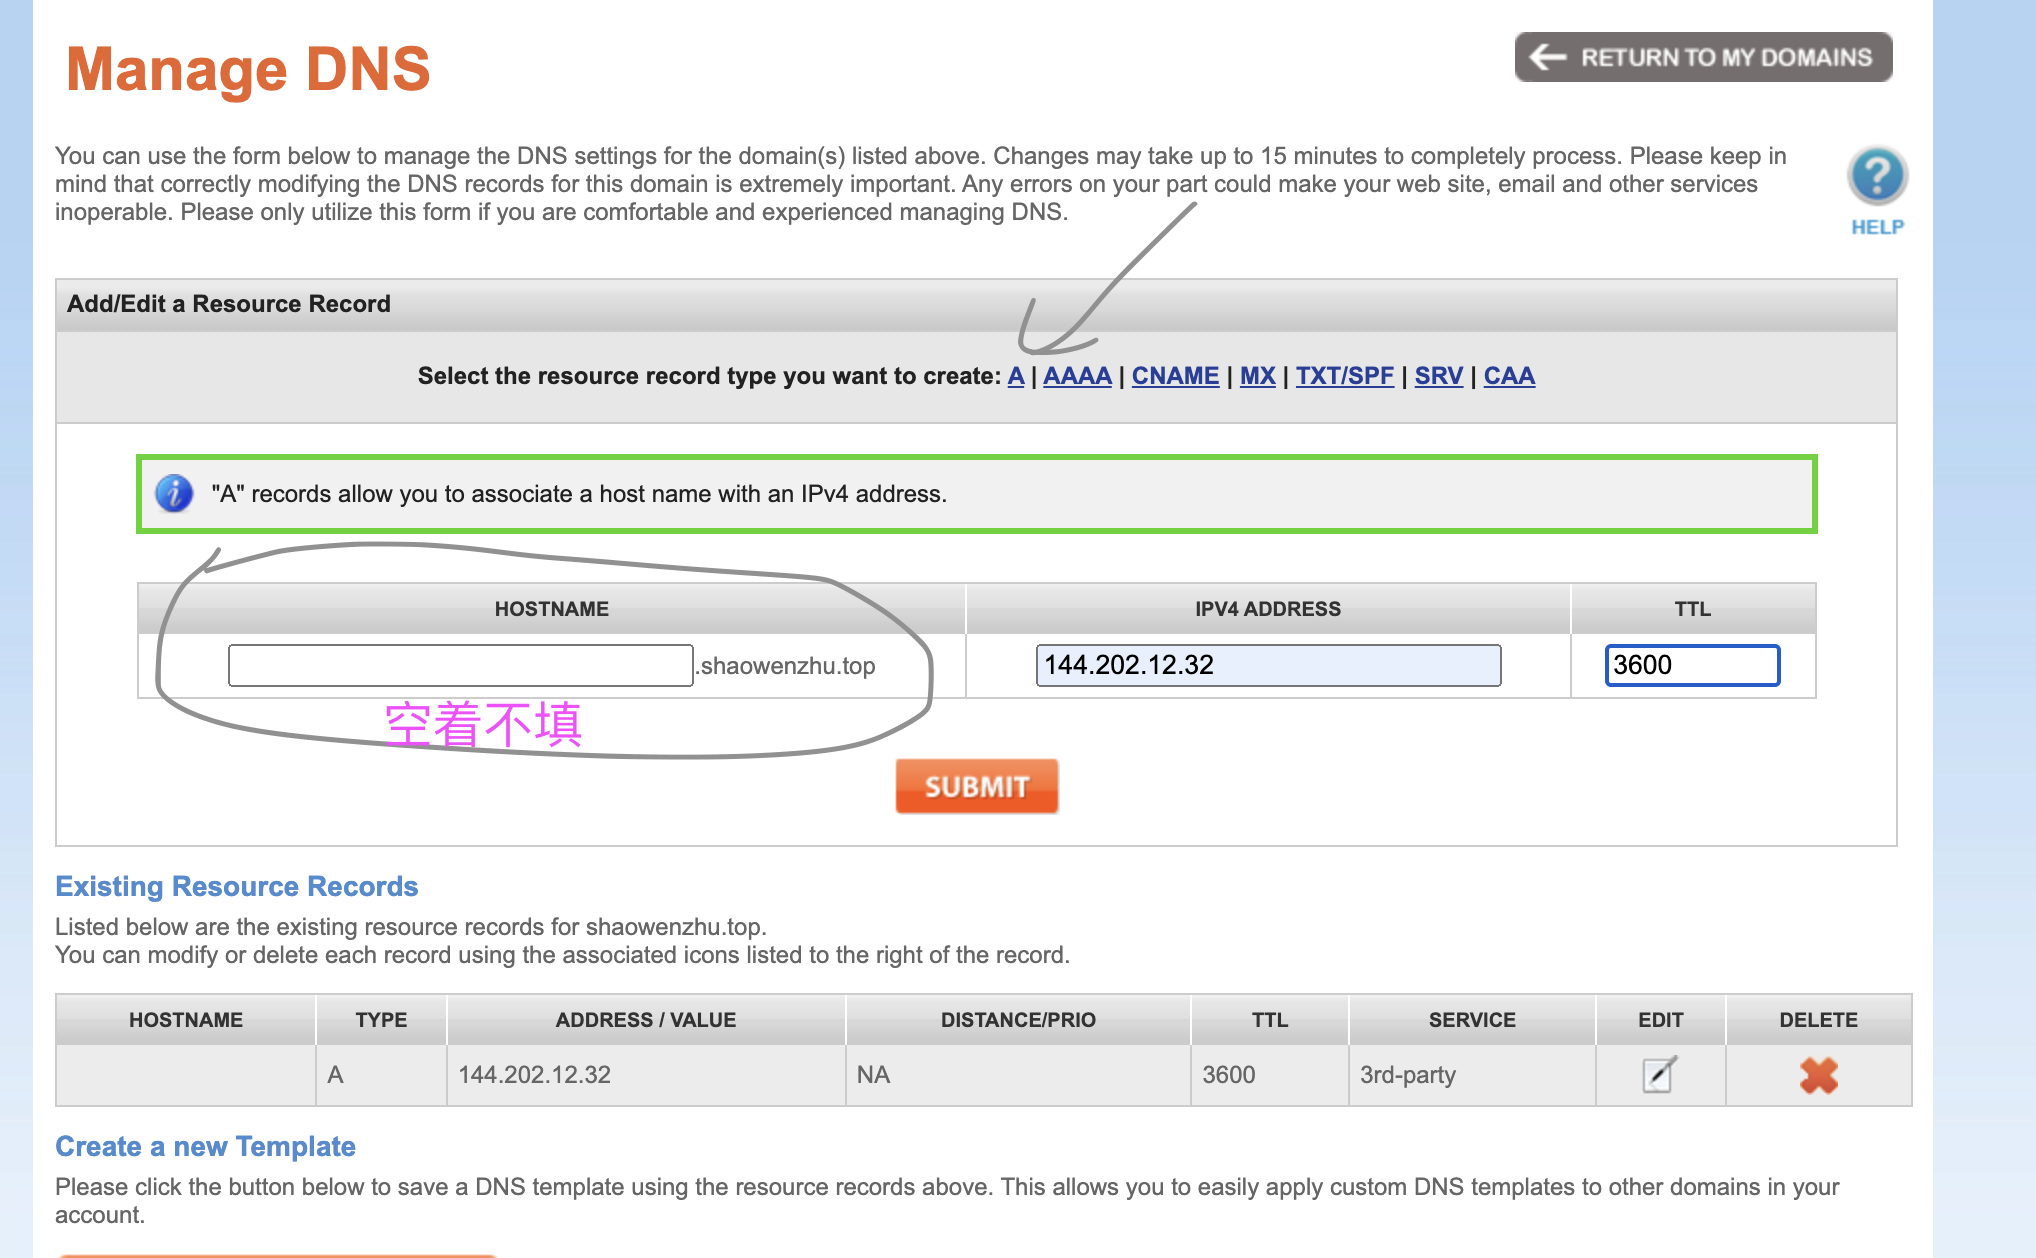

### 4.1. 验证

直接通过登录成功(之前我在服务器上添加了我电脑的公钥, 所以可以免密登录), 

```shell
# ssh root@shaowenzhu.top
The authenticity of host 'shaowenzhu.top (144.202.12.32)' can't be established.
ED25519 key fingerprint is SHA256:sa5vDYS0yhdMRXO6CgMrp9AcQoVQRiDw6TnzTKesnzQ.
This host key is known by the following other names/addresses:
    ~/.ssh/known_hosts:4: 144.202.12.32
Are you sure you want to continue connecting (yes/no/[fingerprint])? yes
Warning: Permanently added 'shaowenzhu.top' (ED25519) to the list of known hosts.
Last failed login: Sun Apr  9 21:12:29 UTC 2023 from net-2-42-138-122.cust.vodafonedsl.it on ssh:notty
There were 2224 failed login attempts since the last successful login.
Last login: Sun Apr  9 12:25:42 2023 from hlfxns017vw-47-55-150-52.dhcp-dynamic.fibreop.ns.bellaliant.net
[root@vultr ~]# 
```

或者通过`ping`验证:

```shell
# ping shaowenzhu.top
PING shaowenzhu.top (144.202.12.32): 56 data bytes
64 bytes from 144.202.12.32: icmp_seq=0 ttl=46 time=47.040 ms
64 bytes from 144.202.12.32: icmp_seq=1 ttl=46 time=42.865 ms
64 bytes from 144.202.12.32: icmp_seq=2 ttl=46 time=43.776 ms
^C
--- shaowenzhu.top ping statistics ---
3 packets transmitted, 3 packets received, 0.0% packet loss
round-trip min/avg/max/stddev = 42.865/44.560/47.040/1.792 ms
```

dig也行, 查看DNS解析过程, 可以看到次级域名的NS和域名管理上填的是一样的, 域名管理页面上需要指定Nameserver的意思是指定具体哪个DNS server来存储我们的域名和ip信息.  

```
dig +trace shaowenzhu.top

; <<>> DiG 9.10.6 <<>> +trace shaowenzhu.top
;; global options: +cmd
.			282403	IN	NS	a.root-servers.net.
.			282403	IN	NS	b.root-servers.net.
.			282403	IN	NS	c.root-servers.net.
.			282403	IN	NS	d.root-servers.net.
.			282403	IN	NS	e.root-servers.net.
.			282403	IN	NS	f.root-servers.net.
.			282403	IN	NS	g.root-servers.net.
.			282403	IN	NS	h.root-servers.net.
.			282403	IN	NS	i.root-servers.net.
.			282403	IN	NS	j.root-servers.net.
.			282403	IN	NS	k.root-servers.net.
.			282403	IN	NS	l.root-servers.net.
.			282403	IN	NS	m.root-servers.net.
;; Received 1025 bytes from 192.168.2.1#53(192.168.2.1) in 12 ms

top.			172800	IN	NS	a.zdnscloud.com.
top.			172800	IN	NS	b.zdnscloud.com.
top.			172800	IN	NS	c.zdnscloud.com.
top.			172800	IN	NS	d.zdnscloud.com.
;; Received 671 bytes from 192.58.128.30#53(j.root-servers.net) in 46 ms

shaowenzhu.top.		3600	IN	NS	ns2.dnsowl.com.
shaowenzhu.top.		3600	IN	NS	ns3.dnsowl.com.
shaowenzhu.top.		3600	IN	NS	ns1.dnsowl.com.
;; Received 352 bytes from 203.99.24.1#53(a.zdnscloud.com) in 109 ms

shaowenzhu.top.		3600	IN	A	144.202.12.32
shaowenzhu.top.		172800	IN	NS	ns1.dnsowl.com.
shaowenzhu.top.		172800	IN	NS	ns2.dnsowl.com.
shaowenzhu.top.		172800	IN	NS	ns3.dnsowl.com.
;; Received 219 bytes from 162.159.26.234#53(ns3.dnsowl.com) in 108 ms
```